# CartPole mit DQN

## Von Q-Tabellen bis Deep-Q-Networks
Reinforcement Learning (RL) ist einer der drei Hauptforschungsbereiche im Bereich des maschinellen Lernens - überwachtes (supervised), unüberwachtes (unsupervised) und Reinforcement Learning. Supervised Learning ist gleichzusetzen mit dem Lernen mit einem Lehrer, wobei anhand von markierten Beispielen der Fehler oder der Abstand zwischen einer Vorhersage und dem erwarteten Ergebnis berechnet wird. Unsupervised Learning entspricht dagegen dem Lernen ohne Lehrer. Es gibt keine "gelabelten" Beispiele, sondern es werden Muster in den Daten entdeckt. Beim Reinforcement Learning wird das Lernen durch Interaktion mit einer gegebenen Umgebung angegangen. Es gibt auch keinen Lehrer, der dem Lernagenten beibringt, wie er mit seiner Umgebung umgehen soll. Stattdessen gibt es nur Belohnungssignale (rewards), die dem Agenten-System eine verzögerte Rückmeldung darüber geben, welche Auswirkungen seine Handlungen auf die Umwelt haben.

Beim Reinforcement Learning interagiert ein Agent mit einer Umgebung mit dem Ziel den höchsten zukünftig erwartbaren Reward zu bekommen. Bei der Gridworld entspricht das dem schnellen Erreichen der Ziel-Zelle, beim Cart-Pole hingegen dem möglichst langen Aufrechthalten des Stabes auf dem Schlitten.

![Cart-Pole Balance](./cartpole_balance.gif)

In diesem Labor wird der Q-Learning Ansatz verwendet, um sowohl die Gridworld, als auch das Cart-Pole Problem zu lösen. Im Vergleich zu anderen RL-Methoden wie die Monte-Carlo Methode, muss beim Q-Learning nicht gewartet werden, bis die ganze Episode (Agent erreicht Ziel-Zelle in Gridworld; Stab fällt runter beim Cart-Pole; 200 Zeitschritte wurden durchlaufen) abgeschlossen wurde, um den return ($G_t := R_t + R_{t+1} + R_{t+2} + ... + R_T$) zu berechnen und damit die action-values ($q_{\pi}(s, a)$) zu schätzen. Stattdessen lernt der Agent konstant anhand dem Stream von Daten die er durch die Interaktion mit der Umgebung bekommt. Das bedeutet, dass der Agent z.B. bei dem Gridworld Problem nach jedem Schritt in der Lage ist die Wahrscheinlichkeit zu schätzen, dass er "gewinnt". Diesen "schrittweise Ansatz" nennt man Temporal-Difference (TD) Learning. Q-Learning nutzt den TD Ansatz, um schrittweise die Q-Werte in der der Q-Tabelle zu aktualisieren.

### Q-Learning
Mit Q-Learning benötigt der Agent keine Kenntnisse über die Dynamik der Umgebung. Er sammelt Erfahrungen und nutzt diese, um die Aktionswertfunktion (action-value function) $Q(s, a)$ unabhängig von der verfolgten policy abzuschätzen. Beim Q-Learning wird die Aktionswertfunktion durch folgende Regel aktualisiert:

$$Q(s_t, a_t) \leftarrow Q(s_t, a_t) + \alpha \big[ R(s_t,a_t)+\gamma \max_{a\in A(s_{t+1})} Q(s_{t+1},a) - Q(s_t, a_t) \big]$$

### Deep-Q-Network
Für sehr einfache Probleme (kleiner state-space), können diese Q-Werte noch in tabellarischer Form dargestellt und persistiert werden. Wird jedoch der state-space zu groß (z.B. wenn beim Cart-Pole die Features aus denen sich der State zusammensetzt nicht mehr diskretisiert werden wie in Aufgabe 2), müssen andere Ansätze her, um dieses Problem zu lösen. Daraus resultiert das Deep Reinforcement Learning, bei dem klassische RL-Methoden wie das Q-Learning mit Deep Learning Ansätzen kombiniert werden. Im Klartext bedeutet das z.B. beim Deep-Q-Network, dass $Q(s_t, a_t)$ durch ein neurolanes Netz, d.h. eine nicht-lineare Funktion, abgebildet wird. Dafür werden die Gewichte des Netzwerks mit in $Q$ gereicht $Q(s_t, a_t, \theta)$. Die durch das neuronale Netz geschätzte nicht-lineare Funktion kann dann benutzt werden, um für jedes state-action Paar einen Q-Wert zu berechnen.

## Kurzfassung: DQN-Begriffe und Konzepte 
### Experience Replay und Replay Memory
Bei _Deep Q-Networks_ wird während des Trainings oft _experience replay_ verwendet. Bei dieser Technik werden die Erfahrungen (experience) des Agenten, die er in jedem Zeitschritt macht, im sogenannten _replay memory_ abgelegt. 

Zum Zeitpunkt $t$, wird die Erfahrung des Agenten $e_t$ als folgendes Tupel definiert:
$$e_t = (s_t, a_t, s_{t+1}, r_{t+1}) $$
Diese Tupel enthält den State des Environments $s_t$, die in $s_t$ gewählte Aktion $a_t$, den Reward $r_{t+1}$ den der Agent zum Zeitpunkt $t+1$ als Ergebnis des Zustandübergangs beschrieben durch $(s_t, a_t)$ erhalten hat, und den nächsten State des Environments $s_{t+1}$.

Alle Erlebnisse des Agenten zu jedem Zeitschritt über alle vom Agenten gespielten Episoden werden im _replay memory_ gespeichert. In der Praxis wird die Größe des _replay memory_ auf eine endliche Anzahl $N$ beschränkt, wodurch nur die letzten N Erlebnisse speichern werden.

Aus diesem _replay memory_ wird eine Zufallsstichprobe entnommen, um das Netzwerk zu trainieren. Der Prozess des Erfahrungssammelns und des Samplings aus dem _replay memory_, das diese Erfahrung speichert, wird als _experience replay_ bezeichnet.

Ein Hauptgrund für die Verwendung des _replay memory_ ist, die Korrelation zwischen aufeinanderfolgenden Samples zu unterbrechen. Würde das Netzwerk nur von aufeinanderfolgenden Erfahrungsstichproben lernen, wie sie im Environment sequentiell auftreten, wären die Stichproben hoch korreliert und würden daher zu einem ineffizienten Lernen führen. Die Entnahme von Stichproben aus dem _replay momory_ bricht diese Korrelation auf. 
### Target Model
Das _target model_ erfüllt nur einen Zweck - Stabiliserung des Trainings!

Hintergrund: Zur Berechnung der optimalen Q-Werte (die wir ja nicht kennen, aber das Modell schätzen soll) müssen die Q-Werte des Folgezustands ebenfalls geschätzt werden. Werden die gleichen Netzgewichte für die Schätzung der Q-Werte für $s_t$ als auch für $s_{t+1}$ genutzt, so aktualisieren wir die ausgegeben Q-Werte aber auch unsere Ziel-Q-Werte, wenn wir unsere Netzgewichte aktualiseren. Unsere Q-Werte werden also mit jeder Iteration aktualisiert, um sich den Ziel-Q-Werten anzunähern, aber die Ziel-Q-Werte bewegen sich ebenfalls in die gleiche Richtung. Dadurch wird die Optimierung zu einer Verfolgungsjagd (dog-chasing-it's-tail problem), was zu Instabilität führt. Während sich unsere Q-Werte ihren Zielen immer weiter annähern, bewegen sich die Ziele immer weiter, weil wir für die Berechnung dieser beiden Werte dasselbe Netzwerk (Gewichte) verwenden.

Deswegen finden bei DQN zwei Netzwerke Anwendung. Das sogenannte _target model_ (_taget network_) ist ein Klon des Policy-Netzwerks. Seine Gewichte werden mit den Gewichten des ursprünglichen Policy-Netzwerks eingefroren, und wir aktualisieren die Gewichte im Zielnetzwerk in bestimmten Zeitschritten auf die neuen Gewichte des Policy-Netzwerks. Diese bestimmte Anzahl von Zeitschritten kann als ein weiterer Hyperparameter betrachtet werden, den wir austesten müssen, um zu sehen, was für uns am besten funktioniert. Wie bereits erwähnt, bleiben diese Werte aber nicht die ganze Zeit über vollständig fixiert. Nach $x$ Zeitschritten aktualisieren wir die Gewichte im _target model_ mit den Gewichten aus unserem Policy-Netzwerk, das wiederum die Ziel-Q-Werte im Hinblick auf das, was es in den vergangenen Zeitschritten gelernt hat, aktualisiert. Dies wird das Policy-Netzwerk dazu veranlassen, sich an die bereits errechneten Ziele anzunähern. 

### Action Mask
Implementierungsdetail um die Schätzung von Q-Werten (prediction) des Netzwerks zu beschleunigen.

*Hintergrund*: Wird dem Netz als Eingabe neben dem state auch die action übergeben, so wird pro möglicher action eine forward propagation durch das Netz nötig, um alle Q-Werte zu berechnen. Nutzt man hingegen lediglich den state als Netzeingabe, so liefert das Netzwerk einen geschätzten Q-Wert für jede mögliche actions aus dem gegebenen Eingangszustand. Wodurch nur eine forward propagation erfolgen muss. Nachteil ist allerdings, dass zum Trainieren des Modells (fitting) die Werte für alle unbekannten actions (Aktionen die im gegebenen Zustand nicht ausgeführt wurden) "maskiert" werden müssen. Dazu lässt man das Netzwerk seine Outputs mit einer Maske multiplizieren, die der _one-hot encoded action_ entspricht, d.h. die alle Ouputs auf 0 setzt, außer dem für die action, die wir tatsächlich gesehen haben. Wir können dann 0 als Ziel für alle unbekannten actions übergeben, und unser neuronales Netz sollte gut funktionieren. Wenn wir die Q-Werte für alle Aktionen vorhersagen wollen, können wir dann einfach eine Maske mit lauter 1en übergeben. Die Netzeingabe ist dann state und _action mask_.

### Model Structure
Dem Netzwerk wird ein State $s$ des Environments übergeben und das Netzwerk gibt wiederum den Q-Wert für jede Aktion, die aus diesem Zustand heraus durchgeführt werden können, aus. Implementierungsdetail (**nicht in Abbildung dargestellt**): Die _action mask_ bildet einen weiteren Input für das Netzwerk (dient allerdings nur der Beschleunigung) und wird mit dem output multiplizert.

![model structure](cartpole_model_structure.svg "Model Structure")


### Ablauf DQN Lernprozess
Bevor das Training beginnt, initialisieren wir zunächst unser _replay memory_ $D$ mit Kapazität $N$. Der _replay memory_ D wird also N Gesamterfahrungen speichern.

Als nächstes initialisieren wir das Netzwerk und das Zielnetzwerk mit Zufallsgewichten (bereits erledigt ;-)

Nun, für jeden Zeitschritt $t$:
Innerhalb der Episode erkunden wir entweder die Umgebung und wählen eine zufällige Aktion aus, oder wir nutzen die Umgebung aus und wählen die Aktion für den gegebenen Zustand, die den höchsten Q-Wert ergibt. Wir erinnern uns, dies ist der Kompromiss zwischen exploration-exploitation, den wir bereits kennen und der Teil eines jeden RL Problems ist.

Wir führen die ausgewählte Aktion im Environment aus und beobachten dann die Belohnung $r_{t+1}$, die für diese Aktion gegeben wird, und wir beobachten auch den nächsten Zustand der Umgebung, $s_{t+1}$. Abschließend speichern wir das gesamte Erfahrungstupel $e_t = (s_t, a_t, s_{t+1}, r_{t+1})$ im _replay memory_ $D$.

Nach der Speicherung eines Erlebnisses im _replay memory_ wird ein Batch von Erfahrungen aus dem _replay memory_ zufällig entnommen (der Einfachheit halber erklären wir jedoch den restlichen Prozess für eine einzelne Probe; die Idee lässt sich dann auf den ganzen Batch verallgemeinern).

Von einem einzelnen Erfahrungsbeispiel aus dem _replay momory_, verarbeiten wir dann den State vor (Graustufenkonvertierung, Beschneiden, Skalieren, etc. - kommt erst im nächsten Termin zum Tragen) und geben den vorverarbeiteten State als Eingabe an das Netzwerk weiter. Dieses Netzwerk bezeichnen wir auch als Policy-Netzwerk, da sein Ziel darin besteht, die optimale Policy durch das Finden der optimalen Q-Funktion zu approximieren.

Die forward propagation erfolgt wie bei jedem andere allgemeinen neuronale Netzwerk auch. Das Modell gibt dann einen geschätzten Q-Wert für jede mögliche Aktion aus dem gegebenen Eingangszustand aus.

Um die Schätzungen des Modells zu verbessern, muss dieses mithilfe der gemachten Erfahrungen trainiert (gefittet) werden. Dazu definieren wir ein Fehlermaß (in unserem Fall den mittleren quadratischen Fehler - MSE) und berechnen den optimalen Q-Wert (target q-value) für ein State-Action-Pair wodurch Keras durch Anwendung des Gradientenabstiegs (Backpropagation) den Fehler minimieren kann. Den optimalen Q-Wert ermitteln wir mit dem bereits bekannten Teil der Q-Learning Aktualisierungsregel:

$$R(s_t,a_t)+\gamma \max_{a\in A(s_{t+1})} Q(s_{t+1},a)$$

D.h. forward propagation des Folgezustandes!

## Aufgabe 3
Löse das CartPole-v0 Environment mittels DQN.

**Hinweis**
Es werden folgende Keras Methoden in der agent.py benötigt:

`predict(x=[...])`
`to_categorical(y=..., num_classes=...)`
`get_weights()`
`set_weights(...)`

In [1]:
%run ../setup.ipynb

In [8]:
from lib.statistics import plot
import time
import numpy as np
from collections import deque
from contextlib import suppress

def interact_with_environment(env, agent, n_episodes=400, max_steps=200, train=True, verbose=True):      
    statistics = []
    
    with suppress(KeyboardInterrupt):
        for episode in range(n_episodes):
            done = False
            total_reward = 0
            state = env.reset()
            episode_start_time = time.time()

            for t in range(max_steps):
                action = agent.act(state)
                next_state, reward, done, _ = env.step(action)

                if train:
                    agent.train((state, action, next_state, reward, done))

                state = next_state
                total_reward += reward

                if done:
                    break

            if verbose and episode % 10 == 0:
                speed = t / (time.time() - episode_start_time)
                print(f'episode: {episode}/{n_episodes}, score: {total_reward}, steps: {t}, '
                      f'e: {agent.epsilon:.3f}, speed: {speed:.2f} steps/s')

            statistics.append({
                'episode': episode,
                'score': total_reward,
                'steps': t
            })
        
    return statistics

### 3.1
Implementiere in **agent.py** einen Agenten, der in der Lage ist das CartPole Environment zu lösen.

episode: 0/400, score: 20.0, steps: 19, e: 1.000, speed: 38760.59 steps/s
episode: 10/400, score: 14.0, steps: 13, e: 1.000, speed: 40660.67 steps/s
episode: 20/400, score: 36.0, steps: 35, e: 1.000, speed: 42924.16 steps/s
episode: 30/400, score: 27.0, steps: 26, e: 1.000, speed: 42465.69 steps/s
episode: 40/400, score: 47.0, steps: 46, e: 1.000, speed: 42951.47 steps/s
episode: 50/400, score: 10.0, steps: 9, e: 1.000, speed: 39321.60 steps/s
episode: 60/400, score: 9.0, steps: 8, e: 1.000, speed: 38612.70 steps/s
episode: 70/400, score: 10.0, steps: 9, e: 1.000, speed: 39199.10 steps/s
episode: 80/400, score: 15.0, steps: 14, e: 1.000, speed: 40054.74 steps/s
episode: 90/400, score: 21.0, steps: 20, e: 1.000, speed: 41221.66 steps/s
episode: 100/400, score: 12.0, steps: 11, e: 0.974, speed: 113.47 steps/s
episode: 110/400, score: 17.0, steps: 16, e: 0.861, speed: 100.85 steps/s
episode: 120/400, score: 52.0, steps: 51, e: 0.697, speed: 126.50 steps/s
episode: 130/400, score: 19.0, st

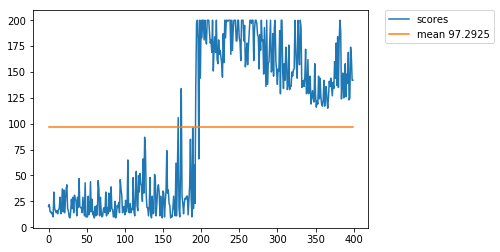

In [15]:
import gym
from agent import DQN
env = gym.make('CartPole-v0')
action_size = env.action_space.n
state_size = env.observation_space.shape[0]

# Hyperparams
annealing_steps = 2000  # not episodes!
gamma = 0.95
epsilon = 1.0
epsilon_min = 0.01
epsilon_decay = (epsilon - epsilon_min) / annealing_steps
alpha = 0.001
batch_size = 64
memory_size = 50000
start_replay_step = 2000
target_model_update_interval = 1000

agent = DQN(action_size=action_size, state_size=state_size, gamma=gamma, 
            epsilon=epsilon, epsilon_decay=epsilon_decay, epsilon_min=epsilon_min, 
            alpha=alpha, batch_size=batch_size, memory_size=memory_size,
            start_replay_step=start_replay_step, 
            target_model_update_interval=target_model_update_interval)
statistics = interact_with_environment(env, agent, verbose=True)
env.close()
plot(statistics)

#### **Aufbau Keras Modell**
Der Aufbau des Keras-Modells kann zur Verdeutlichung nochmals geplottet werden.

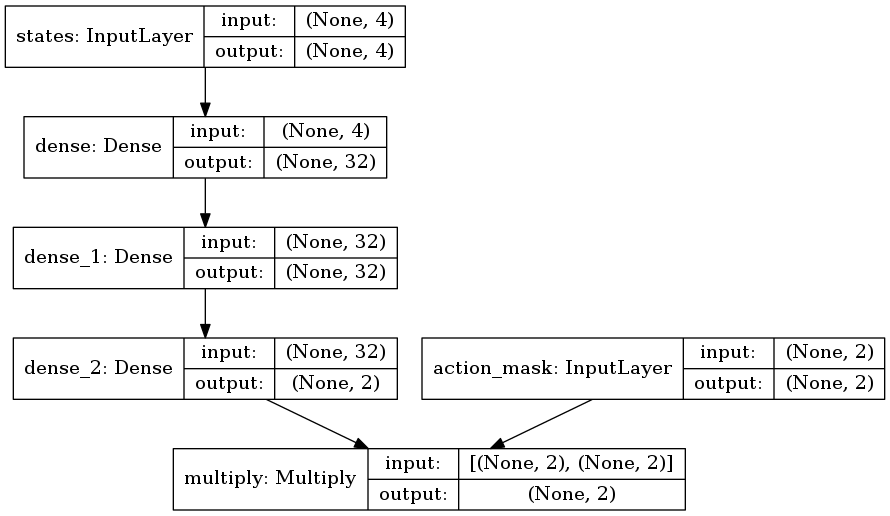

In [4]:
import IPython
import tensorflow as tf
tf.keras.utils.plot_model(agent.model, to_file='keras_plot_model.png', show_shapes=True)
IPython.display.Image('keras_plot_model.png')

#### **Performanceauswertung (Video)**
Der folgende Code dient zur Performancebewertung des Agenten. Der (hoffentlich) trainierte Agent wird bei seiner Ausführung gefilmt, trainiert aber nicht weiter. Anschließend wird das Video seiner besten Performance dargestellt.

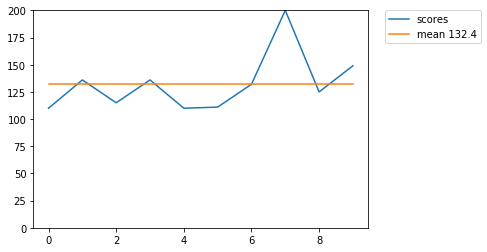

In [16]:
from gym.wrappers import Monitor
from lib.statistics import html_video_embedding

# capture every episode and clean 'video' folder before each run
env = gym.make('CartPole-v0')
env = Monitor(env, './video', video_callable=lambda episode_id: True, force=True, uid='id')
statistics = interact_with_environment(env, agent, n_episodes=10, train=False, verbose=False)
env.close()

plot(statistics, y_limits=(0,200))
html_video_embedding(statistics)